<a href="https://colab.research.google.com/github/Ahmad3752/Colab/blob/main/Advance_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
BTW IN THIS LAB I HAVE DONE VARIOUS EXPERIMNETS SUCH AS I HAVE EXPLORED PAIRPLOT IT GIVES A WHOLE A VIEW WHAT I DISCOVERED
WAS USING DIFFERENT MODELS ALSO ONE OTHER InterESTED THING WAS THAT FIRST I THINK THEIR WERE SOME COLUMNS WHICH HAVE RELATIVELY LOW CORRELATION WITH
OUTPUT ALSO THEY HAVE MULTICOLINEARITY SO WHEN I DELETE THE MAE WAS HIGH BUT WHEN I USED MAE WAS LESS


In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('/content/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [130]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [131]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [132]:
df.isna().sum(
)

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [133]:
meanx=df['total_bedrooms'].mean()
df['total_bedrooms'].fillna(meanx,inplace=True)


<ipython-input-133-b04e091a4f5b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(meanx,inplace=True)


In [134]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [135]:
low, high = df["median_income"].quantile([0.1, 0.8])
mask_area = df["median_income"].between(low, high)
df = df[mask_area]

<Axes: >

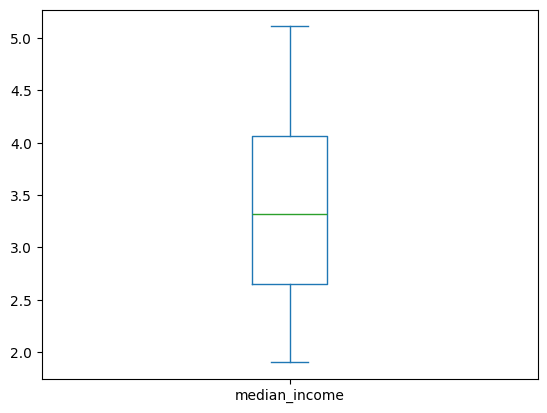

In [136]:
df['median_income'].plot(kind='box')

In [137]:
df.count()

,0
longitude,14450
latitude,14450
housing_median_age,14450
total_rooms,14450
total_bedrooms,14450
population,14450
households,14450
median_income,14450
median_house_value,14450
ocean_proximity,14450


In [138]:
df['total_bedrooms'].mean()

552.733597855562

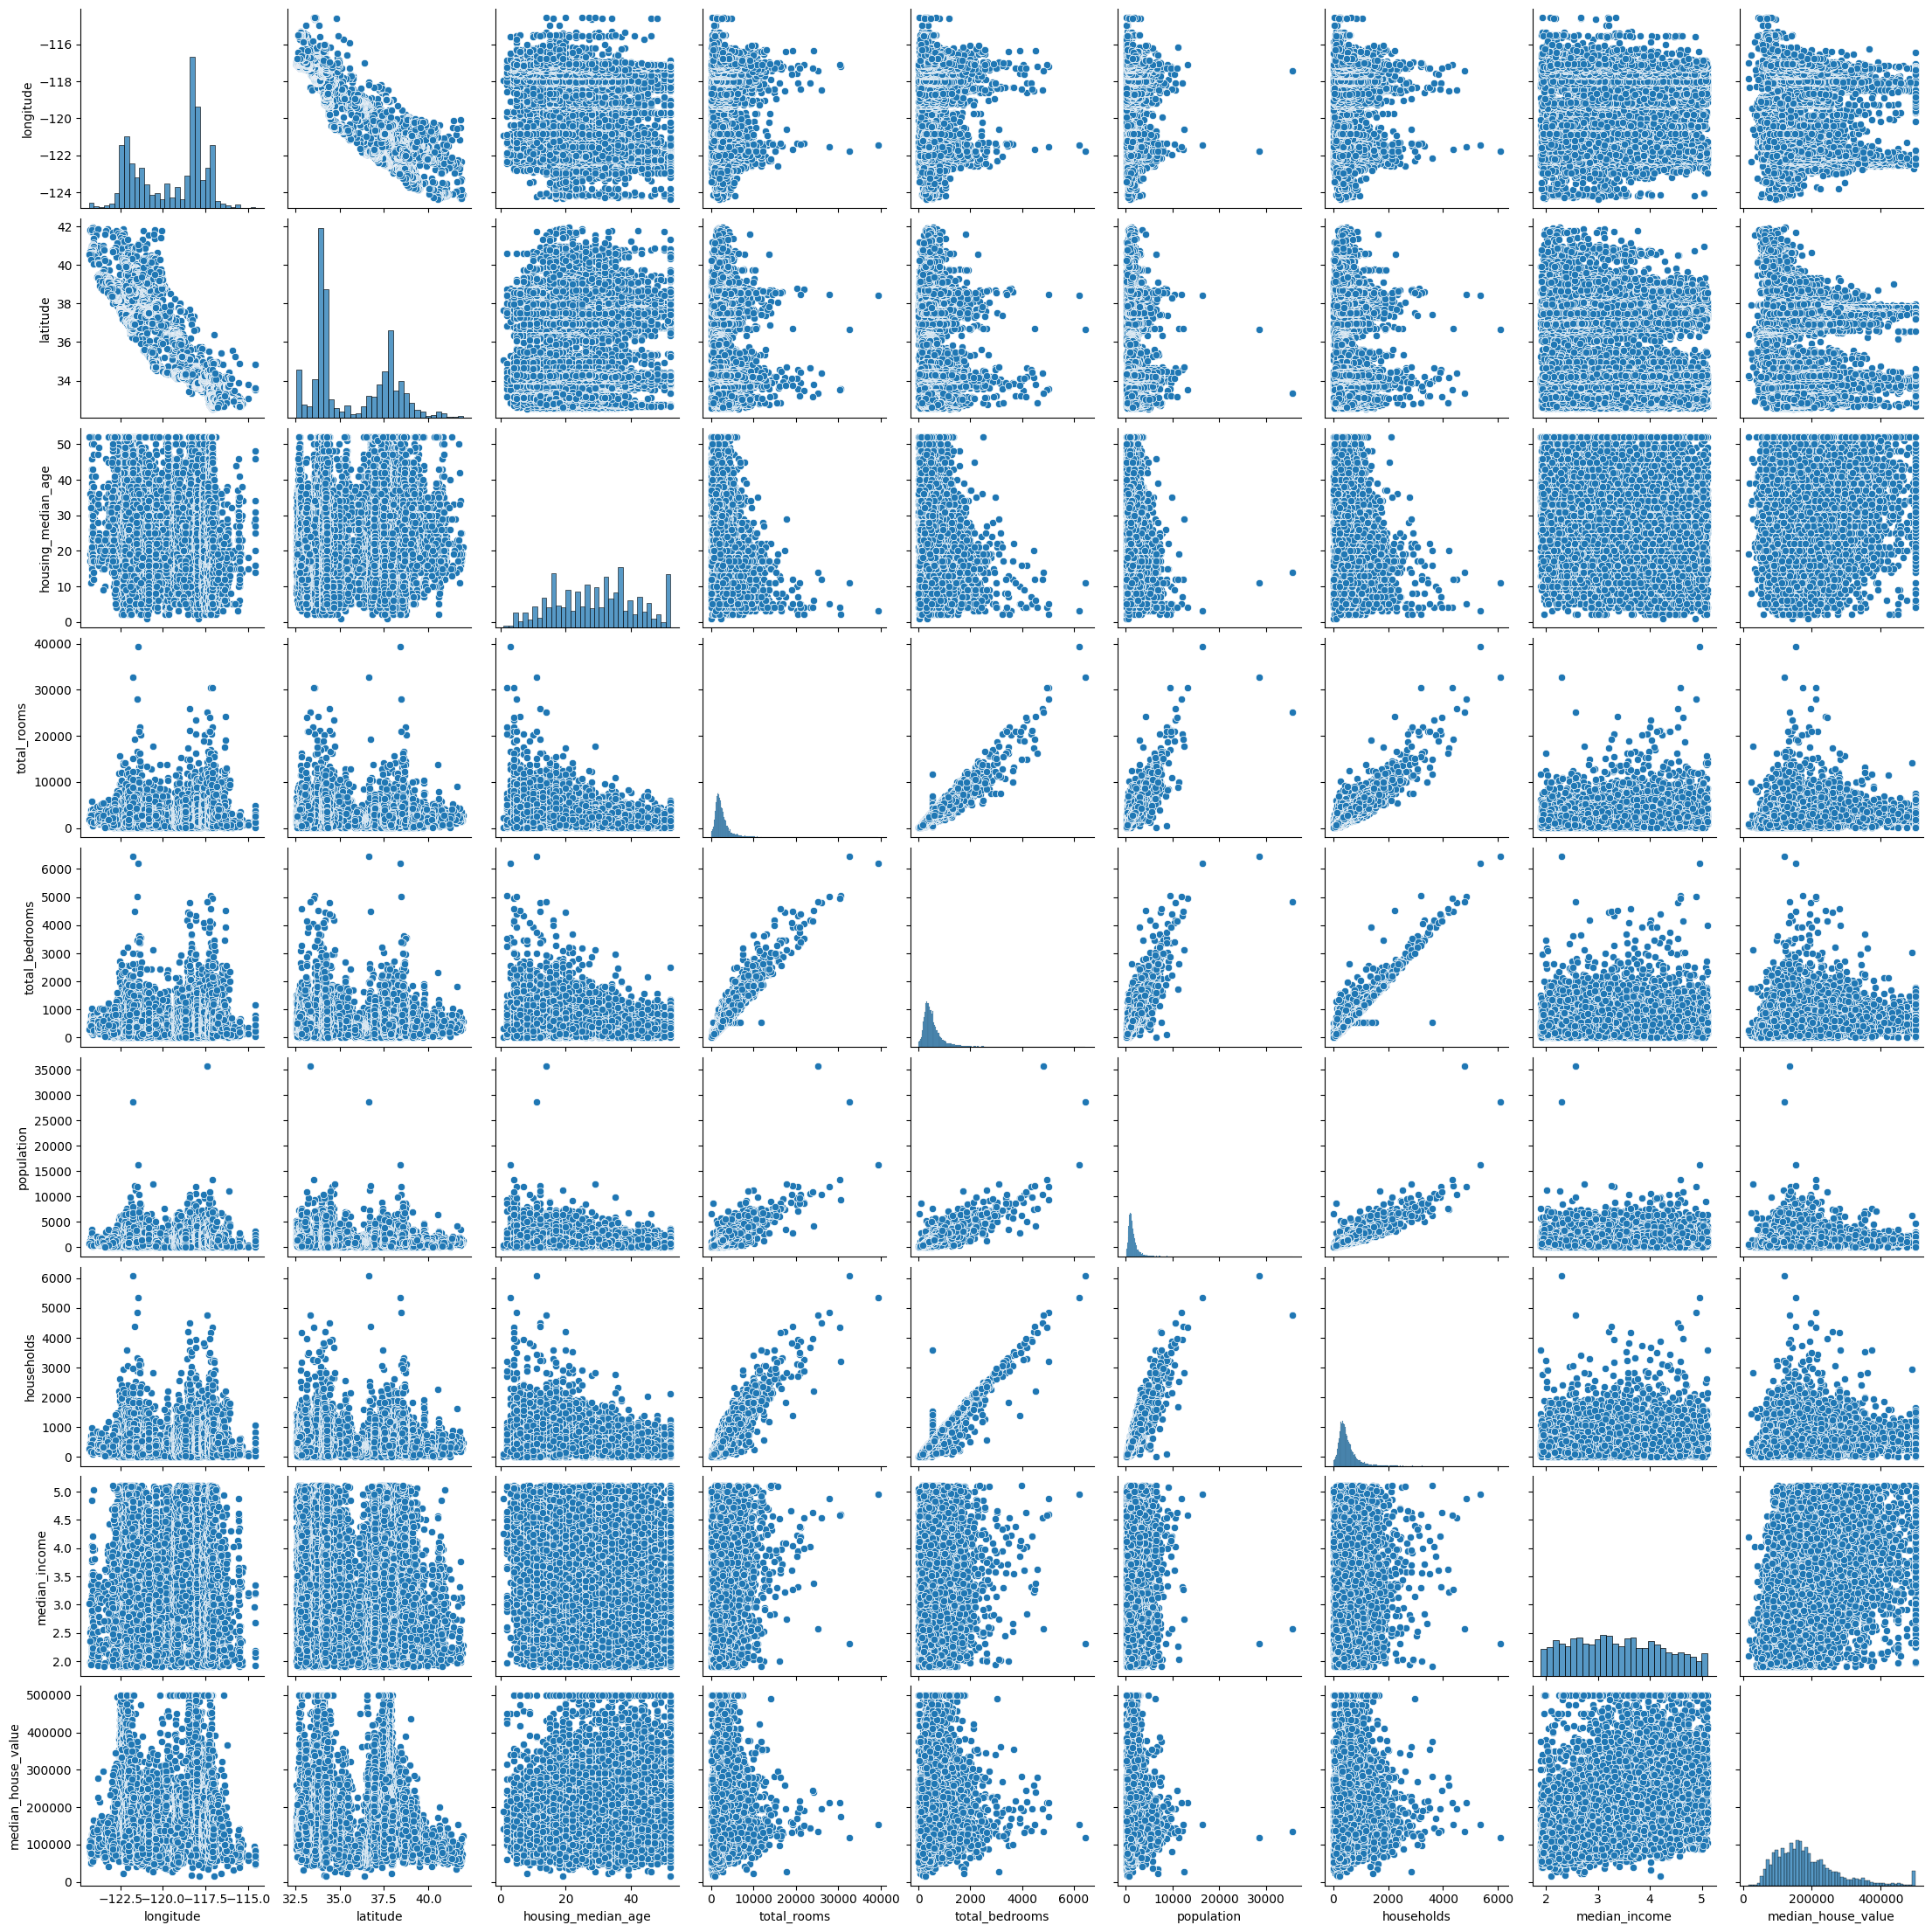

In [112]:
sns.pairplot(df, diag_kind="hist")

<Axes: >

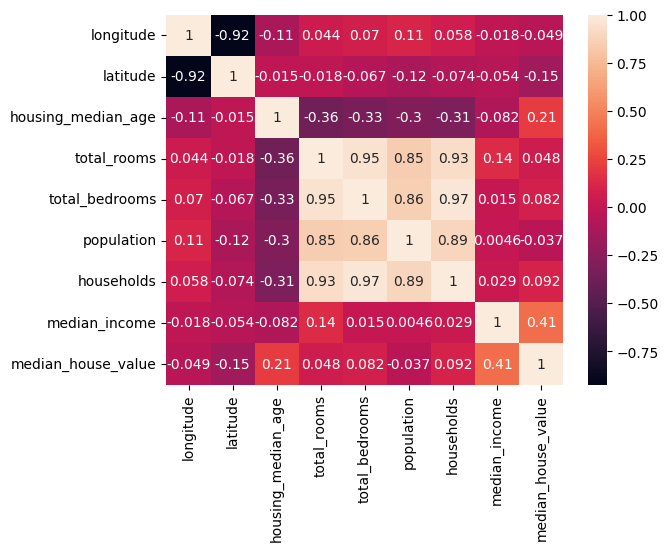

In [139]:
cor=df.drop(columns=['ocean_proximity']).corr()
sns.heatmap(cor,annot=True)

dropping input features based on multicollinearity

In [114]:
drop_cols=['total_bedrooms','population','households','longitude']
df.drop(columns=drop_cols,inplace=True)

<Axes: >

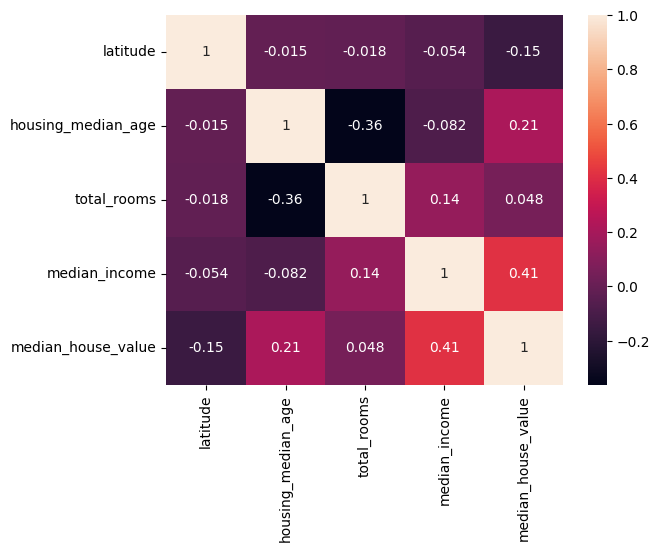

In [115]:
cor=df.drop(columns=['ocean_proximity']).corr()
sns.heatmap(cor,annot=True)

In [140]:
target='median_house_value'
X = df.drop(columns=[target])
y = df[target]
print(X.shape)
print(y.shape)

(14450, 9)
(14450,)


In [141]:
from sklearn.model_selection import train_test_split
X_train,X_temp,y_train,y_temp=train_test_split(X,y,test_size=.3,random_state=42,stratify=None)
X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,test_size=.5,random_state=42,stratify=None)

In [142]:

from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error



In [143]:
def evaluate_model(model, X_train, y_train, X_val, y_val, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)

    print(f" {model_name}:")
    print(f"  - Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  - Mean Squared Error (MSE): {mse:.2f}\n")

    return model, mae, mse


In [144]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge (L2)": Ridge(alpha=1.0),
    "Lasso (L1)": Lasso(alpha=0.1),
    "ElasticNet (L1 + L2)": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

results = {}

for name, regressor in models.items():
    model = make_pipeline(
        OneHotEncoder(use_cat_names=True),
        StandardScaler(),
        regressor
    )
    trained_model, mae, mse = evaluate_model(model, X_train, y_train, X_val, y_val, name)
    results[name] = (trained_model, mae, mse)


 Linear Regression:
  - Mean Absolute Error (MAE): 48097.83
  - Mean Squared Error (MSE): 4644203923.44

 Ridge (L2):
  - Mean Absolute Error (MAE): 48096.84
  - Mean Squared Error (MSE): 4644559317.88

 Lasso (L1):
  - Mean Absolute Error (MAE): 48097.81
  - Mean Squared Error (MSE): 4644211504.69

 ElasticNet (L1 + L2):
  - Mean Absolute Error (MAE): 48814.85
  - Mean Squared Error (MSE): 4846279019.90



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.097e+11, tolerance: 8.317e+09
  model = cd_fast.enet_coordinate_descent(
